# Assignment 03
***


### 그래프를 그리기 위해 Python3의 matplotlib module을 사용합니다.


---
### 모듈 정의

In [28]:
import matplotlib.pyplot as plt
import numpy as np

---

## 1. Load MNIST training dataset.

- MNIST training dataset을 불러옵니다.



In [29]:
file_data = "mnist_train.csv"
handle_file = open(file_data, "r")
data = handle_file.readlines()
handle_file.close()

- 필요 함수 및 변수 선언



In [30]:
size_row  = 28    # height of the image
size_col  = 28    # width of the image
num_image = len(data)
count     = 0     # count for the number of images
#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):
    data_normalized = (data - min(data)) / (max(data) - min(data))
    return(data_normalized)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

- data를 한 줄씩(feature data) 받아서 정규화하여 list_label, list_image로 구분하여 데이터 저장



In [31]:
for line in data:
    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)
    list_label[count]       = label
    list_image[:, count]    = im_vector   
    count += 1

- 각 image를 처음부터 100장 까지 그래프로 보입니다.(label name 이 image와 중복되므로 보기 헷갈림)



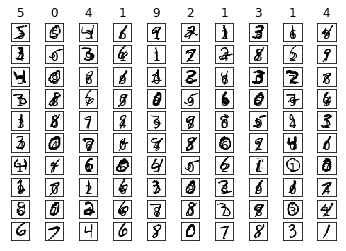

In [41]:
# 
# plot first 100 images out of 10,000 with their labels
# 
for i in range(100):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 10, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

## 2. Compute the average images for each label (digit) based on L2-norm.

- 각 라벨에 대한 평균 이미지를 계산(L2-norm에 따른)

 - Norm은 벡터의 길이 혹은 크기를 측정하는 방법(함수)입니다.


- ### $L_P={\big(\sum\limits_{i}^n{\mid{x}\mid}^p\big)^\frac1p}$

- p는 Lorm의 차수를 의미합니다. 
- p가 1이면 L1 Norm이고 p가 2이면 L2 Norm입니다.
- n은 대상 벡터의 요소 수입니다.

- L2 Norm은 p가 2인 Norm입니다. 
- L2 Norm은 n 차원 좌표평면(유클리드 공간)에서의 벡터의 크기를 계산하기 때문에 Euclidean norm이라고도 합니다. L2 Norm 공식은 다음과 같습니다.

- ### $L_2={\sqrt{\sum\limits_{i}^n{x_i}^2}=\sqrt{x_1^2+x_2^2+x_3^2+\dotsb+x_n^2}=\sqrt{x^Tx}}$

- numpy는 norm 기능을 제공합니다. 
- “numpy.linalg.norm” 함수를 이용하여 Norm을 차수에 맞게 바로 계산할 수 있습니다. 

- “numpy.linalg.norm” 사용 예시

In [18]:
x = np.random.randint(low=1, high=10, size=(1, 3))
print(x)
L2_norm = np.linalg.norm(x,2)
print( L2_norm)

[[9 5 8]]
13.038404810405297


- numpy는 norm 기능을 제공합니다. 
- “numpy.linalg.norm” 함수를 이용하여 Norm을 차수에 맞게 바로 계산할 수 있습니다. 

## 3. Visualize the average images.

- 평균 이미지를 시각화합니다.

- 각 feature의 평균을 구하기 위하여 각 label 별로 데이터를 모아야합니다.
- dict형의 data2를 선언하여 각 label 별로 data를 append합니다.
- count만큼의 list_image가 있으므로 각 image data를 label를 key로 하는 data2에 저장합니다.
- L2-norm를 적용하기 위하여 label 별로 저장된 data들을 np.array(data2[i]).T.tolist()합니다. (transpose)
- im_vector에는 각 label의 feature의 L2-norm 값의 배열이 들어가 있게 됩니다. 이를 reshape하여 plot하여 시각화합니다.

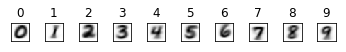

In [42]:
data2 = {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}

for i in range(0,count):
    data2[list_label[i]].append(list_image[:, i])

for i in range(0,10):
    im_vector = np.linalg.norm(np.array(data2[i]).T.tolist(),ord=2,axis=1)
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 10, i+1)
    plt.title(i)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()